In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
import statsmodels.formula.api as smf
import scipy.spatial.distance as dist
import itertools
import math
import warnings
warnings.filterwarnings(action='once')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.incremental_pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
reload(utils_jjm)
reload(dlc_utils)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:07.813061. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [3]:
#cnmfe_file_key = pd.read_csv('/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/cnmfe_key.csv')
cnmfe_file_key = pd.read_csv('/projects/p30771/dlc_analysis/openfield_dlc_output/cnmfe_key.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:08.673291. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [4]:
#cnmfe_base_dir = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/'
cnmfe_base_dir = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/'
# '27-Feb_17_33_59_out.mat' '28-Feb_16_21_21_out.mat' '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat' throwing error
wt_CNMFE_files = ['29-Jan_12_35_06_out.mat','30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '22-Mar_22_52_02_out.mat',
                 '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat']

ko_CNMFE_files = ['30-Jan_16_54_31_out.mat','30-Jan_14_00_19_out.mat','31-Jan_01_43_49_out.mat','31-Jan_00_12_24_out.mat','31-Mar_13_28_15_out.mat', '29-Mar_21_42_20_out.mat', '13-Apr_17_57_40_out.mat', '29-Mar_14_27_55_out.mat', '13-Apr_16_01_20_out.mat',
                 '13-Apr_16_11_27_out.mat', '29-Mar_13_39_44_out.mat']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:09.583098. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [5]:
#tracking_files = ['/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 
tracking_files = ['/projects/p30771/dlc_analysis/openfield_dlc_output/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:10.320546. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [6]:
#tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:10.940888. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
CNMFE_dir_paths_list = [str(cnmfe_base_dir+fname) for fname in wt_CNMFE_files]
#CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:11.541848. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [8]:
CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:12.178152. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_32_15_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_13_27_27_out.mat']

In [10]:
tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:39.031740. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_04142020.csv']

In [ ]:
CNMFE_file = CNMFE_dir_paths_list[0]
tracking_file = tracking_files[0]

In [ ]:
cell_fluorescence = sio.loadmat(CNMFE_file)
C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
C_z_scored = C_timedelta.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
C_normalized_z_scored = C_normalized.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_normalized)-1)*(1/20), len(C_normalized)), unit='s'), drop=True)

In [ ]:
interpolated = utils_jjm.prepare_timedelta_dfs(tracking_file)

In [ ]:
com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)

In [11]:
binning_time = 1 # seconds 
body_part_for_tracking = 'tail_base' #

grouped_raw_data = {}
success = []
failed = []
for CNMFE_file, tracking_file in zip(CNMFE_dir_paths_list[0:1], tracking_files[0:1]):
    print(CNMFE_file)
    print(tracking_file)
    try:
        # load cell fluorescence 
        cell_fluorescence = sio.loadmat(CNMFE_file)
        C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
        C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_z_scored = C_timedelta.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        C_normalized_z_scored = C_normalized.apply(stats.zscore).set_index(pd.to_timedelta(np.linspace(0, (len(C_normalized)-1)*(1/20), len(C_normalized)), unit='s'), drop=True)
        # create tracking time deltas
        interpolated = utils_jjm.prepare_timedelta_dfs(tracking_file)
        #C_z_scored_filtered = utils_jjm.filter_out_by_size(C_z_scored, cell_contours, for_dims, 0.6, 100)
        #store results 
        #load spatial components by session
        com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
        cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)
        
        #store results 
        grouped_raw_data[tracking_file.split('/')[-2]] = {'C': C_timedelta, 'C_z_scored': C_z_scored, 'C_normalized': C_normalized, 'C_normalized_z_scored': C_normalized_z_scored, 
                                                          'interpolated' : interpolated, 'com' : com_df, 'spatial_components' : spatial_components, 'cell_contours': cell_contours,  
                                                         'for_dims' : for_dims}
        success.append((tracking_file.split('/')[-2], CNMFE_file.split('/')[-1]))
    except FileNotFoundError:
        failed.append(tracking_file)
    except OSError:
        failed.append(tracking_file)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:57:53.631525. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat
/projects/p30771/dlc_analysis/openfield_dlc_output/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_04142020.csv


## triggered averaging 

In [12]:
## combine dfs for each session to bin velocity values across dfs
#downsample
new_sampling_interval = .2
V_df = pd.concat([grouped_raw_data[session]['interpolated'].resample(str(new_sampling_interval)+'S').max() 
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
all_sessions_v_bins = pd.cut(V_df['tail_base'], bins=50)

V_df['velocity_bins'] = all_sessions_v_bins

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:58:01.346732. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [13]:
#V_df.index

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:58:02.425150. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [14]:
filtered_for_analysis = {}
filtered_for_analysis_normalized = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized_z_scored'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
    filtered_for_analysis_normalized[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
C_norm_df = pd.concat([filtered_for_analysis_normalized[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 10:58:03.190087. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [21]:
C_norm_df.loc['GRIN039_H12_M26_S54']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:01:46.630254. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,1,2,3,4,6,8,9,10,11,12,...,77,78,80,81,82,86,87,89,92,msCamFrame
00:00:00,9.584799e-02,0.063020,0.035247,0.144497,0.726842,0.726884,0.731344,1.905063e-01,0.046192,0.136891,...,0.257302,0.764787,0.482399,0.690118,0.746664,0.000437,0.007972,0.094285,0.001843,0.000078
00:00:00.200000,1.342613e-01,0.065264,0.032855,0.180691,0.726880,0.726865,0.729842,1.664785e-01,0.018765,0.136579,...,0.257250,0.764725,0.482419,0.703729,0.746781,0.000447,0.008036,0.073267,0.001338,0.000182
00:00:00.400000,1.009119e-01,0.062636,0.024803,0.222096,0.726877,0.726877,0.740098,1.480966e-01,0.007623,0.124246,...,0.257265,0.764944,0.482759,0.695401,0.746620,0.000410,0.010380,0.093594,0.001599,0.000287
00:00:00.600000,1.206908e-01,0.061244,0.018724,0.177142,0.726900,0.726852,0.742373,1.835346e-01,0.003097,0.114494,...,0.257213,0.765207,0.483356,0.687820,0.746535,0.000390,0.010294,0.069170,0.000810,0.000391
00:00:00.800000,1.444091e-01,0.075907,0.017802,0.247447,0.726912,0.726852,0.739828,1.655127e-01,0.001258,0.111559,...,0.257220,0.764861,0.482775,0.694727,0.746403,0.000342,0.009905,0.127754,0.001207,0.000495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:32:17.800000,2.841031e-07,0.023555,0.024426,0.000008,0.727506,0.726843,0.739035,2.349836e-07,0.006227,0.180117,...,0.257163,0.911739,0.507079,0.758136,0.746621,0.587564,0.339235,0.100397,0.586969,1.009710
00:32:18,1.940636e-07,0.016549,0.041165,0.000006,0.727420,0.726839,0.737295,1.500308e-07,0.003558,0.171963,...,0.257163,1.134880,0.517429,0.909500,0.746645,0.572423,0.307130,0.099234,1.376837,1.009814
00:32:18.200000,1.325599e-07,0.011628,0.033241,0.000004,0.727420,0.726836,0.735172,9.579074e-08,0.025913,0.193221,...,0.257163,1.234335,0.513817,0.880575,0.746544,0.557672,0.278063,0.146168,1.035699,1.009919
00:32:18.400000,9.054826e-08,0.017125,0.028396,0.000003,0.727508,0.726862,0.733256,6.115986e-08,0.019587,0.213608,...,0.257163,1.051138,0.510576,0.735719,0.746639,0.543301,0.251747,0.178525,0.779084,1.010023


In [25]:
V_df

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:04:46.845455. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


index  miniscope_light  tail_base  \
GRIN039_H12_M26_S54 00:00:00          10.010000         2.855264   2.171160   
                    00:00:00.200000   12.690000         2.728127   2.149969   
                    00:00:00.400000   15.370000         2.600990   2.128777   
                    00:00:00.600000   18.050000         2.473853   2.107586   
                    00:00:00.800000   20.730000         2.346716   2.086394   
...                                         ...              ...        ...   
                    00:48:28.200000  763.715833         0.163536   0.126800   
                    00:48:28.400000  766.039167         0.161624   0.144631   
                    00:48:28.600000  768.362500         0.159712   0.162462   
                    00:48:28.800000  770.685833         0.157800   0.180292   
                    00:48:29         771.266667         0.155888   0.184750   

                                     ear_left  centroid  ear_right  \
GRIN039_H12_M26_S54 00:00:00         2.233086  2.058301   2.024822   
                    00:00:00.200000  2.264927  2.006667   2.008735   
                    00:00:00.400000  2.296769  1.955033   1.992648   
                    00:00:00.600000  2.328611  1.903400   1.976562   
                    00:00:00.800000  2.360452  1.851766   1.960475   
...                                       ...       ...        ...   
                    00:48:28.200000  0.125686  0.066462   0.157977   
                    00:48:28.400000  0.123613  0.069834   0.154114   
                    00:48:28.600000  0.121541  0.073207   0.150251   
                    00:48:28.800000  0.119468  0.076579   0.146387   
                    00:48:29         0.117395  0.077423   0.142524   

                                     miniscope_light_likelihood  \
GRIN039_H12_M26_S54 00:00:00                                1.0   
                    00:00:00.200000                         1.0   
                    00:00:00.400000                         1.0   
                    00:00:00.600000                         1.0   
                    00:00:00.800000                         1.0   
...                                                         ...   
                    00:48:28.200000                         1.0   
                    00:48:28.400000                         1.0   
                    00:48:28.600000                         1.0   
                    00:48:28.800000                         1.0   
                    00:48:29                                1.0   

                                     tail_base_likelihood  \
GRIN039_H12_M26_S54 00:00:00                     1.000000   
                    00:00:00.200000              1.000000   
                    00:00:00.400000              1.000000   
                    00:00:00.600000              1.000000   
                    00:00:00.800000              1.000000   
...                                                   ...   
                    00:48:28.200000              0.999998   
                    00:48:28.400000              0.999998   
                    00:48:28.600000              0.999998   
                    00:48:28.800000              0.999998   
                    00:48:29                     0.999998   

                                     ear_left_likelihood  centroid_likelihood  \
GRIN039_H12_M26_S54 00:00:00                    0.999998             1.000000   
                    00:00:00.200000             0.999968             0.999992   
                    00:00:00.400000             0.999937             0.999983   
                    00:00:00.600000             0.999907             0.999975   
                    00:00:00.800000             0.999876             0.999967   
...                                                  ...                  ...   
                    00:48:28.200000             0.990034             0.997481   
                    00:48:28.400000             0.989956          

In [26]:
#bin by activity threshold (body_part, resting_time_threshold, active_time_threshold, crossing_threshold, resting_threshold, activity_threshold)
binned_velocity_df = pd.DataFrame([dlc_utils.bin_by_activity_threshold(V_df.loc[session]['tail_base'], 80, 20, 1, 2, 3)
                                for session in list(grouped_raw_data.keys())], index=list(grouped_raw_data.keys()))
binned_velocity_df = binned_velocity_df.transpose()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:05:24.534131. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [27]:
#need to make sure x axis from velocity binned df matches axis from grouped raw data 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:05:27.245514. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [28]:
binned_velocity_df

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:05:27.923376. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,GRIN039_H12_M26_S54
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
14541,0.0
14542,0.0
14543,0.0
14544,0.0


In [29]:
regions_by_session = {}
for session in list(grouped_raw_data.keys()):
    # gets indicies where animal crosses a velocity threshold
    crossing_indicies = utils_jjm.select_trigger_regions(binned_velocity_df[session], 0.5, 0.5, 20)
    # for each cell average the basseline ~10 seconds before crossing the velocity threshold    

    movement_regions_in_recording = {}
    for sample in crossing_indicies:
        raw_data_to_baseline = C_norm_df.loc[session].dropna(axis=1).drop(['msCamFrame'], axis=1)

        # so say baseline is 80 samples to 20 samples before threshold
        baseline_region = raw_data_to_baseline[sample-80:sample-20]
        movement_region = raw_data_to_baseline[sample-80:sample+80]

        baseline_region_std_dev = baseline_region.std(axis=0)
        baseline_region_mean = baseline_region.mean(axis=0)

        movement_region_z_scored = pd.DataFrame((movement_region-baseline_region_mean.values)/baseline_region_std_dev)
    
        movement_regions_in_recording[sample] = movement_region_z_scored
    regions_by_session[session] = pd.concat(movement_regions_in_recording, axis=1, keys=crossing_indicies)
    
z_scored_regions_by_session = pd.concat(regions_by_session, axis=1, keys=list(grouped_raw_data.keys()))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:05:52.311924. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [30]:
# get info to look at plots of individual cell activity
np.array(list(grouped_raw_data.keys()))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:05:54.386441. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


array(['GRIN039_H12_M26_S54'], dtype='<U19')

In [31]:
session = 'GRIN039_H12_M26_S54'
session_df = z_scored_regions_by_session[session]
sample_crossing_indicies = np.array([sample_idx for sample_idx in session_df.columns.levels[0] if sample_idx in session_df.columns])
sample_crossing_indicies

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:05:56.968004. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


array([ 1097,  2097,  2644,  3297,  5522,  5798,  5913,  6412,  7620,
        8471,  9041,  9615, 10521, 10722, 11432, 11936, 12911])

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:42:02.656990. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


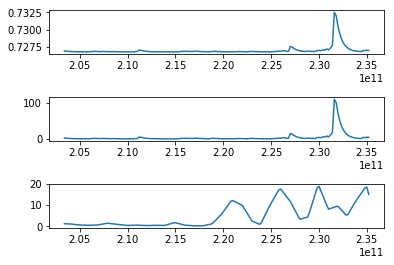

RMS noise: 14.236165540491289
Peak: 110.5561126755646
Peak/RMS: 7.765863101346693


In [98]:
##plot individual cell activity
#raw "pre z score" region
#zscores
#velocity
sample = sample_crossing_indicies[0]
cell = 6
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(C_norm_df.loc[session][cell][sample-80:sample+80]) 
ax2.plot(z_scored_regions_by_session[session][sample][cell])
ax3.plot(V_df.loc[session]['tail_base'][sample-80:sample+80]) 
plt.subplots_adjust(hspace=1)
plt.show()

#display rms noise for trace 
rms = np.sqrt(np.mean(np.square(z_scored_regions_by_session[session][sample][cell])))
peak = np.max(z_scored_regions_by_session[session][sample][cell])
print('RMS noise:', rms)
print('Peak:', peak)
print('Peak/RMS:', peak/rms)

In [ ]:
peak_RMS_ratio = 

In [99]:
z_scored_regions_by_session['GRIN039_H12_M26_S54'][1097]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:45:41.471213. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,1,2,3,4,6,8,9,10,11,12,...,75,77,78,80,81,82,86,87,89,92
00:03:23.400000,0.133777,-0.435065,-0.456457,0.039356,1.930060,-0.335319,0.744720,0.405260,0.945058,-0.013997,...,-0.570604,-0.430730,-0.389221,-0.908421,-0.886313,1.097354,-0.199047,-0.825455,0.340659,0.000601
00:03:23.600000,-0.569263,-0.489798,-0.456458,0.926706,1.105670,-0.644018,0.674485,0.074516,-0.124982,0.226949,...,-0.580360,-0.619948,0.173350,-0.797943,-0.627940,0.388873,-0.365327,0.114591,-0.036406,-0.290587
00:03:23.800000,-0.445069,-0.361011,-0.456459,0.276405,0.662971,-0.861226,0.834588,-0.413211,-0.261092,0.624960,...,-0.585005,-0.349686,-0.454719,-0.822647,0.571387,0.045183,-0.505181,0.268534,-0.242352,-0.354827
00:03:24,-0.600191,-0.395344,-0.456459,0.932489,0.428567,-0.602101,0.402177,-0.262293,0.192238,0.497706,...,-0.587216,-0.431865,-0.194102,-0.885381,0.434892,0.426875,-0.622806,0.747846,-0.354837,-0.303870
00:03:24.200000,-0.268204,-0.456097,-0.456460,0.527143,0.072943,-0.462233,0.693650,-0.122163,0.289313,1.019377,...,-0.588268,-0.479530,-0.478427,-0.896894,1.058190,0.134883,-0.721738,0.689716,-0.416274,-0.519182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:32:17.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:32:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:32:18.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:32:18.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
z_scored_regions_by_session['GRIN039_H12_M26_S54'][1097].max(axis=0)[z_scored_regions_by_session['GRIN039_H12_M26_S54'][1097].max(axis=0)>10]

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:30:01.311328. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


1      12.239282
2      32.600574
6     110.556113
8      15.188531
9      11.442718
10     50.227743
12     28.032923
17     44.508966
18     41.731389
21     56.771707
44     11.034339
68     14.795689
70     15.004588
78     10.807958
81     29.613276
87     73.015055
89     20.219293
dtype: float64

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-02-04 11:19:59.560382. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


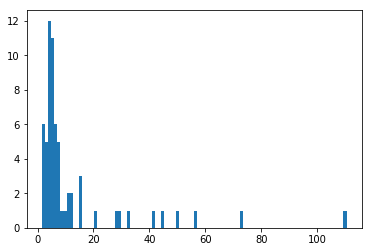

In [52]:
#histogram of all z score 
plt.hist(z_scored_regions_by_session['GRIN039_H12_M26_S54'][1097].max(axis=0), 100)
plt.show()

In [ ]:
#concat by mouse 
concacted_by_mouse = {}
for mouse in list(set(session[0:7] for session in list(z_scored_regions_by_session.columns.levels[0]))):
    dfs_by_mouse = []
    sessions = []
    for session in list(z_scored_regions_by_session.columns.levels[0]):
        if mouse in session:
            if not(z_scored_regions_by_session[session].empty):
                means = z_scored_regions_by_session[session].mean(axis=1, level=0)
                dfs_by_mouse.append(means)
                sessions.append(session)
    if len(dfs_by_mouse)>0:
        concacted_by_mouse[mouse] = pd.concat(dfs_by_mouse, axis=1, keys=sessions)
combined_by_mouse = pd.concat(list(concacted_by_mouse.values()), axis=1, keys=list(concacted_by_mouse.keys()))

In [ ]:
combined_by_mouse.head()

In [ ]:
combined_by_mouse_timedelta = combined_by_mouse.set_index(pd.to_timedelta(np.linspace(0, (len(combined_by_mouse)-1)*(1/5), len(combined_by_mouse)), unit='s'), drop=True)

In [ ]:
plt.plot(combined_by_mouse_timedelta.mean(axis=1))

In [ ]:
#resampled_for_plotting.head()

In [ ]:
plt.rcParams.update({'font.size': 22})
df_to_plot = resampled_for_plotting
activity_measure = 'spatial_coordination'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
scale_f = 0.0868
mean=df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f
plt.plot(x, df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f, color='k')
std_error = ((df_to_plot.std(axis=1, level=2)['velocity'])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]))*scale_f
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('velocity cm/sec')
ax.set_xlabel('time (seconds)')
ax.axvline(x=(0), linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('/home/jma819/presentation_files/wt_velocity_spatial_coord_triggered.svg', transparent=True)
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/v_triggered.pdf', transparent=True)
plt.show()

In [ ]:
activity_measure = 'fluorescence'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
mean = df_to_plot.mean(axis=1, level=2)[activity_measure].values
plt.plot(x, mean, color='k')
std_error = (df_to_plot.std(axis=1, level=2)[activity_measure])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]*1)
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('dF/F z-score')
ax.set_xlabel('time (seconds)')
ax.axvline(x=0, linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('.svg')
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/wt_fluorescence_triggered.pdf', transparent=True)
plt.show()

## event ISIs 

In [ ]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized_z_scored'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))

In [ ]:
C_df = C_df.drop(['msCamFrame'], axis=1)

In [ ]:
ISIs_by_session = []
for session in list(grouped_raw_data.keys()):
    print(session)
    event_indicies, event_times, event_ISIs = utils_jjm.get_ISIs(C_df.loc[session].dropna(axis=1), 20, .1, np.array(C_df.loc[session].dropna(axis=1).columns), 2)
    ISIs_by_session.append(event_ISIs)